# Project Python Foundations: FoodHub Data Analysis

| Project Submission| Date |
| --- | --- |
| Rob Barker | June 7, 2024 | 

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

---
## Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

# Visual Studio Code implementation using %pip.
%pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user 

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import libraries for data manipulation.
import numpy as np
import pandas as pd

# import libraries for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns

### Development Environment
* Local development with Visual Studio Code.
* Jupyter Notebook and Python 3.11.7 with Anaconda3. 
* Google Colab/Drive not used.
* Generated HTML using the jupyter cli

   ```jupyter nbconvert --to html PYF_Project_LearnerNotebook_FullCode.ipynb```
* Added --- (markdown) lines for easier readability for myself. 

### Formatting Notes
* Added line separators for readability.

---
## Understanding the structure of the data

In [5]:
# Read the dataset from the foodhub_order.csv file. Pandas DataFrame object assigned to foodhub_df.
foodhub_df = pd.read_csv("/Users/robbarker/Desktop/FoodHub Project/foodhub_order.csv")

In [6]:
# Retrieve first 5 rows of the dataset.
foodhub_df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


---
### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [7]:
# Retrieve number of rows and columns using the shape attribute of the DataFrame.
rows, columns = foodhub_df.shape

# Print the number of rows and columns from the dataset. Output is formatted into thousands. 
# There are only 9 columns but for consistency, the output includes (,) format.
print(f'Number of Rows: {rows:,}')
print(f'Number of Columns: {columns:,}')

Number of Rows: 1,898
Number of Columns: 9


#### Observations:
The number of rows and columns in the DataFrame, foodhub_df, are:
* 1,898 rows
* 9 columns

---
### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [8]:
# Retrieve summary information of the DataFrame using the info() method.
foodhub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Using the DataFrame info() method the following observations can be made:

| Information | Food Hub DataFrame | 
| -------- | -------- | 
| Number of rows and columns. | 1,898 rows and 9 columns. | 
| Column names and corresponding data types. | 1 float64, 4 int64, 4 object | 
| Number of non-null values in each column. foodhubdf is complete with no non-null values. | Non-Null Count indicates a full dataset. | 
| Memory usage of the DataFrame | 133.6+ KB | 

---
### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [9]:
# Determine if there is any missing data.
missing_values = foodhub_df.isnull().sum()

# Output if there are any missing data points in the dataset.
if missing_values.sum() > 0:
    print("There are missing data points in the Food Hub Project dataset.")
else:
    print("There are no missing data points in the Food Hub Project dataset.")

There are no missing data points in the Food Hub Project dataset.


#### Observations:
There are no missing data points in the Food Hub Project dataset. With no missing data in the Food Hub Project dataset this is beneficial for analysis and modeling to visualize a more accurate and comprehensive investigation.


---
### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

 There are several different methods that can be used to view the statistical information of a dataset. 
* The describe() method for each statistic of the dataset.
* The describe() method with .T for an easier readable view.
* View specific methods for min, mean and max.

All are demonstrated below.

In [10]:
# Retrieve full statistics of the dataset.
foodhub_df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [11]:
# Using the describe() function with (include-'all').T can make the data more readable.
foodhub_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [119]:
# Retrieve the statisical summary of the data.
foodprep_min_value = foodhub_df['food_preparation_time'].min()
foodprep_avg_value = foodhub_df['food_preparation_time'].mean()
foodprep_max_value = foodhub_df['food_preparation_time'].max()

print('Food preparation time statistics in minutes:')
print('Minimum:', foodprep_min_value)
print('Average:', foodprep_avg_value)
print('Maximum:', foodprep_max_value)


Food preparation time statistics in minutes:
Minimum: 20
Average: 27.371970495258168
Maximum: 35


#### Observations:
Full details are provided to understand all of the different data points in the dataset for general statistics. In some cases this may be too much information to consume easily. As the output illustrates below it is not so ease to quickly find the minimum, average and maximum information for food preparation time (food_preparation_time) without spending time looking at the columns and rows.

| order_id | customer_id | cost_of_the_order | food_preparation_time | delivery_time
| -------- | -------- | -------- | -------- | -------- |
| count	| 1.898000e+03	| 1898.000000	| 1898.000000	|1898.000000	|1898.000000
| mean	| 1.477496e+06	| 171168.478398	| 16.498851	| 27.371970	| 24.161749
| std	| 5.480497e+02	| 113698.139743	| 7.483812	| 4.632481	| 4.972637
| min	| 1.476547e+06	| 1311.000000	| 4.470000	| 20.000000	| 15.000000
| 25%	| 1.477021e+06	| 77787.750000	| 12.080000	| 23.000000	| 20.000000
| 50%	| 1.477496e+06	| 128600.000000	| 14.140000	| 27.000000	| 25.000000
| 75%	| 1.477970e+06	| 270525.000000	| 22.297500	| 31.000000	| 28.000000
| max	| 1.478444e+06	| 405334.000000	| 35.410000	| 35.000000	| 33.000000

Retrieving statistical information for a column is valuable to understand a specific data point quickly.

The statistical summary for food preparation (food_preparation_time) is as follows:
* Minimum time is 20 minutes
* Average time is 27.3 minutes
* Maximum time is 35 minutes

---
### **Question 5:** How many orders are not rated? [1 mark]

In [120]:
# Count the number of orders that have not been rated (rating = 'Not given').
no_ratings = foodhub_df['rating'].value_counts()['Not given']

# Print the number of orders that have not been rated.
print('The number of orders not rated are ' + str(no_ratings))

# Calculate the percentage of orders that have not been rated.
no_ratings_impact = round((no_ratings/rows)*100, 2)
print(f'Unrated orders have a {no_ratings_impact}% impact on the dataset.')

The number of orders not rated are 736
Unrated orders have a 38.78% impact on the dataset.


#### Observations:
The number of orders not rated is 736 out of 1,898. The immediate observation that can be made is unrated orders could be impacting a restaurants ability to understand if there are quality issues, being able to offer special offers for repeat and/or new customers. To get more accurate rating data a recommendation is to incentivize customers to submit ratings.

---
# Exploratory Data Analysis (EDA)

## Univariate Analysis

---
### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

##### Data Dictionary Reference
| Column | Definition |
| ------ | ---------- |
| order_id | Unique ID of the order |
| customer_id | ID of the customer who ordered the food |
| restaurant_name | Name of the restaurant |
| cuisine_type | Cuisine ordered by the customer |
| cost_of_the_order | Cost of the order |
| day_of_the_week | Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday) |
| rating | Rating given by the customer out of 5 |
| food_preparation_time | Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation. |
| delivery_time | Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps |

### Order ID

In [79]:
# Check for the unique orders in the dataset.
print(f'There are {foodhub_df["order_id"].nunique():,}.')

There are 1,898.


### Customer ID

In [81]:
# Check for unique customers in the dataset.
customer_ids = foodhub_df['customer_id'].nunique()
print(f'There are {customer_ids:,} customers.')

There are 1,200 customers.


#### Restaurant Name


In [83]:
# Check for unique restaurants in the dataset.
restaurants = foodhub_df['restaurant_name'].nunique()
print(f'There are {restaurants:,} restaurants.')


There are 178 restaurants.


#### Cuisine Types

In [84]:
# Check unique cuisine types in the dataset.
cuisine_types = foodhub_df['cuisine_type'].nunique()
print(f'There are {cuisine_types:,} cuisines.')

There are 14 cuisines.


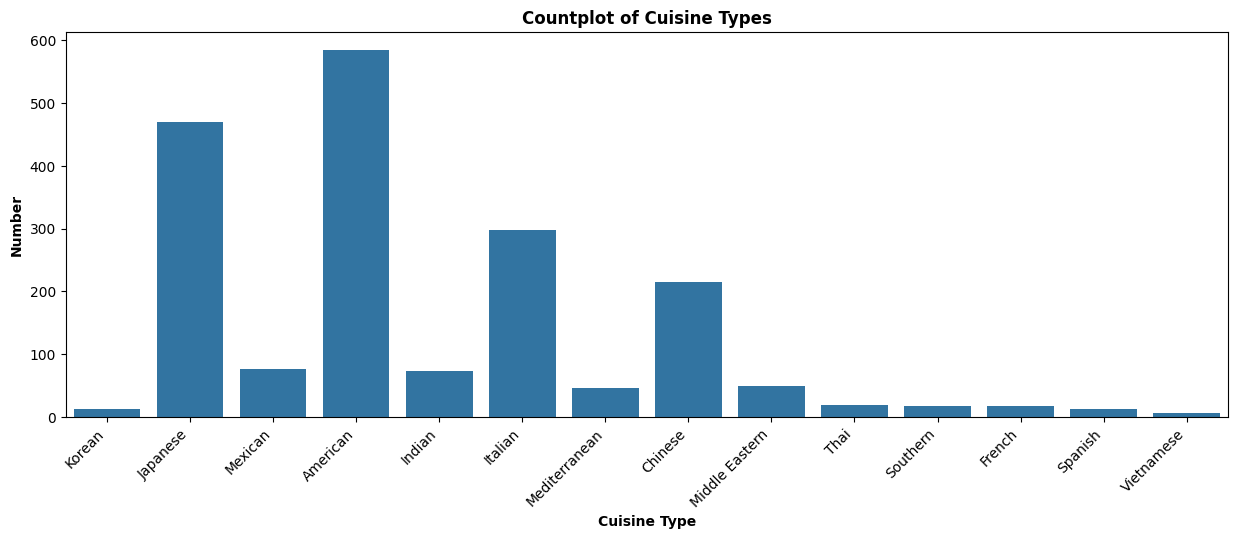

In [88]:
# Create countplot for the different cuisine types.
plt.figure(figsize = (15,5))
sns.countplot(data = foodhub_df, x = 'cuisine_type')

# Set the labels, title, position, fontsize and alignment for the output.
plt.title('Countplot of Cuisine Types', fontsize=12, fontweight='bold')
plt.xlabel('Cuisine Type', fontsize=10, fontweight='bold')
plt.ylabel('Number', fontsize=10, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Show plot.
plt.show()

#### Cost of the Order

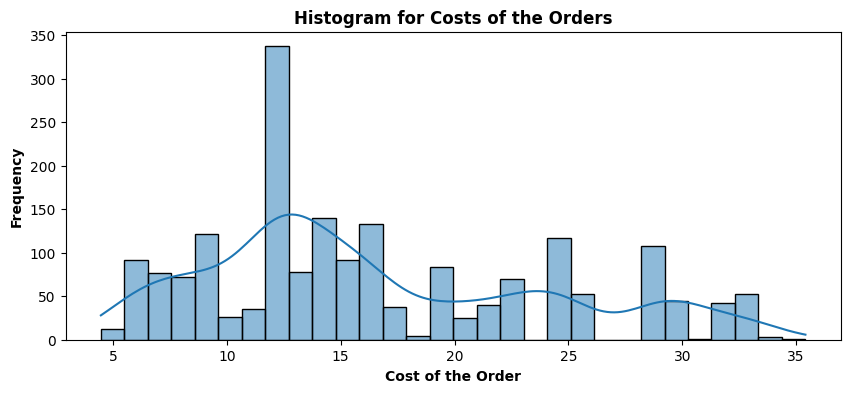

In [121]:
# Plot a histogram for the 'cost_of_order' column.
plt.figure(figsize=(10, 4))
sns.histplot(foodhub_df['cost_of_the_order'], bins=30, edgecolor='black', kde=True)

# Set the labels, title, position, fontsize and alignment for the barchart output.
plt.title('Histogram for Costs of the Orders', fontsize=12, fontweight='bold')
plt.xlabel('Cost of the Order', fontsize=10, fontweight='bold')
plt.ylabel('Frequency', fontsize=10, fontweight='bold')

# Show to plot.
plt.show()

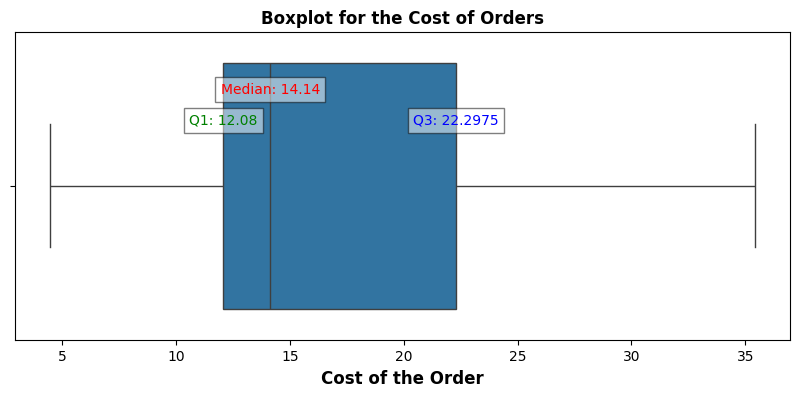

In [122]:
# Create boxplot for cost of orders.
plt.figure(figsize=(10, 4))
box_plot = sns.boxplot(x=foodhub_df['cost_of_the_order'])

# Calculate quartiles and median
Q1 = foodhub_df['cost_of_the_order'].quantile(0.25)
Q3 = foodhub_df['cost_of_the_order'].quantile(0.75)
median = foodhub_df['cost_of_the_order'].median()

# Set the labels, title, position, fontsize and alignment for the output.
plt.text(x=median, y=-0.3, s=f'Median: {median}', color='red', ha='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(x=Q1, y=-0.2, s=f'Q1: {Q1}', color='green', ha='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(x=Q3, y=-0.2, s=f'Q3: {Q3}', color='blue', ha='center', bbox=dict(facecolor='white', alpha=0.5)) 
plt.xlabel('Cost of the Order', fontsize=12, fontweight='bold')
plt.title('Boxplot for the Cost of Orders', fontsize=12, fontweight='bold')

# Show the plot.
plt.show()

#### Day of the Week

In [104]:
# Get the unique days of the week in the dataset.
days_of_week = foodhub_df['day_of_the_week'].nunique()

# Get the names of the days of the week.
names_of_days = foodhub_df['day_of_the_week'].unique()

# Convert the names of the days to a string.
names_of_days_str = ', '.join(names_of_days)

# Output the number of days of the week and the names of the days.
print(f'There are {days_of_week:,} days of the week. The days of the week are {names_of_days_str}.')

There are 2 days of the week. The days of the week are Weekend, Weekday.


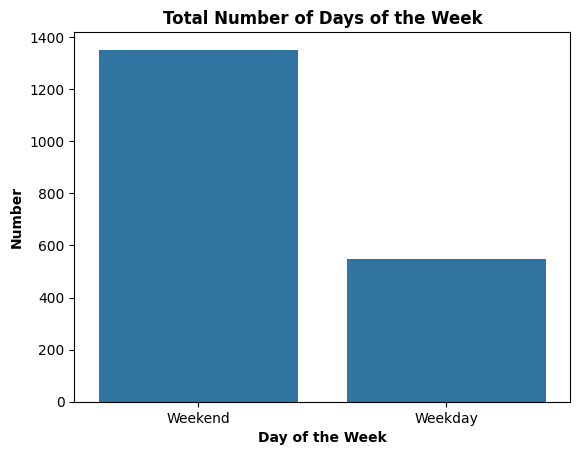

In [106]:
# Create a countplot for the number of days of the week.
sns.countplot(data = foodhub_df, x = 'day_of_the_week') 

# Set the labels, title, position, fontsize and alignment for the output.
plt.title('Total Number of Days of the Week', fontsize=12, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=10, fontweight='bold')
plt.ylabel('Number', fontsize=10, fontweight='bold')

# Show the plot.
plt.show()

#### Rating


In [123]:
# Check for unique ratings in the dataset.
ratings = foodhub_df['rating'].nunique()

# Get the names of the days of the week.
ratings_values = foodhub_df['rating'].unique()

# Convert the unique rating values to a string.
rating_value = ', '.join(ratings_values)

# Output the unique ratings and value names.
print(f'There are {ratings:,} unique ratings. The values are {rating_value}.')


There are 4 unique ratings. The values are Not given, 5, 3, 4.


##### Countplot of Ratings

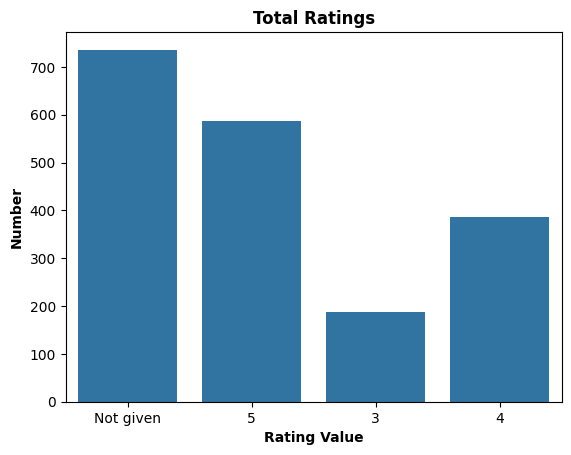

In [118]:
# Create a countplot for the number of ratings.
sns.countplot(data = foodhub_df, x = 'rating') 

# Set the labels, title, position, fontsize and alignment for the output.
plt.title('Total Ratings', fontsize=12, fontweight='bold')
plt.xlabel('Rating Value', fontsize=10, fontweight='bold')
plt.ylabel('Number', fontsize=10, fontweight='bold')

# Show the plot.
plt.show()

#### Food Preparation Time

##### Food Preparation Time Histogram

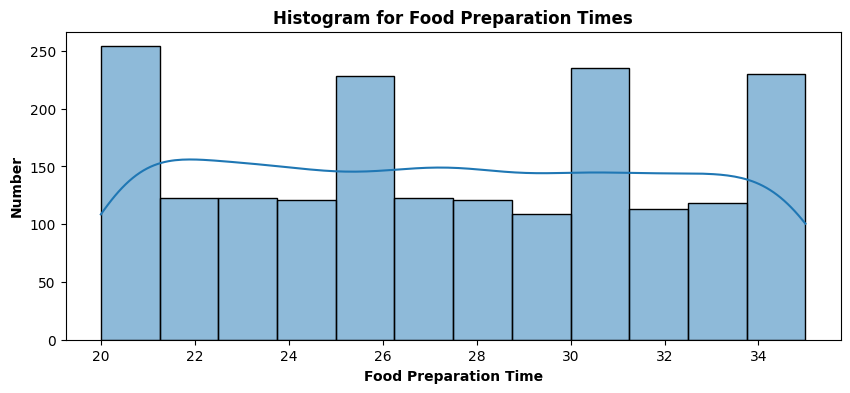

In [124]:
# Plot a histogram for the food preprations times.
plt.figure(figsize=(10, 4))
sns.histplot(foodhub_df['food_preparation_time'], edgecolor='black', kde=True)

# Set the labels, title, position, fontsize and alignment for the histogram.
plt.title('Histogram for Food Preparation Times', fontsize=12, fontweight='bold')
plt.xlabel('Food Preparation Time', fontsize=10, fontweight='bold')
plt.ylabel('Number', fontsize=10, fontweight='bold')

# Show to plot.
plt.show()

##### Food Preparation Time Boxplot

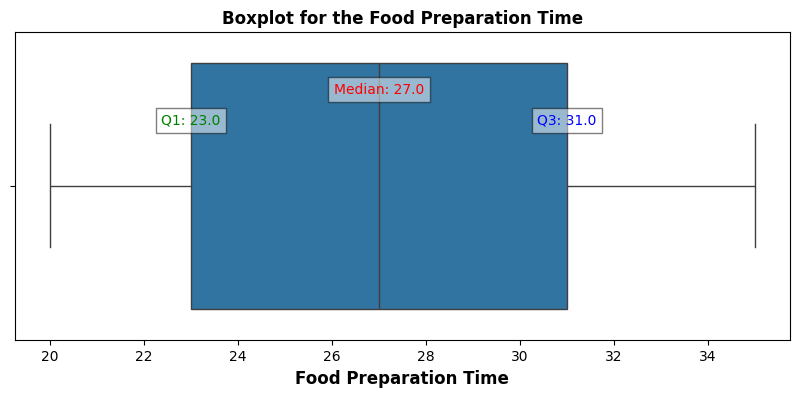

In [127]:
# Create boxplot for food preprations times.
plt.figure(figsize=(10, 4))
box_plot = sns.boxplot(x=foodhub_df['food_preparation_time'])

# Calculate quartiles and median
Q1 = foodhub_df['food_preparation_time'].quantile(0.25)
Q3 = foodhub_df['food_preparation_time'].quantile(0.75)
median = foodhub_df['food_preparation_time'].median()

# Set the labels, title, position, fontsize and alignment for the output.
plt.text(x=median, y=-0.3, s=f'Median: {median}', color='red', ha='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(x=Q1, y=-0.2, s=f'Q1: {Q1}', color='green', ha='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(x=Q3, y=-0.2, s=f'Q3: {Q3}', color='blue', ha='center', bbox=dict(facecolor='white', alpha=0.5)) 
plt.xlabel('Food Preparation Time', fontsize=12, fontweight='bold')
plt.title('Boxplot for the Food Preparation Time', fontsize=12, fontweight='bold')

# Show the plot.
plt.show()

#### Delivery Time

##### Histogram of Delivery Times

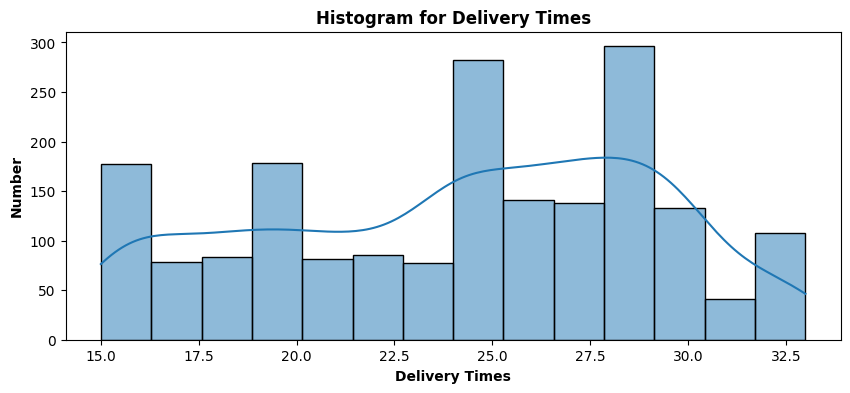

In [125]:
# Plot a histogram for the delivery time.
plt.figure(figsize=(10, 4))
sns.histplot(foodhub_df['delivery_time'], edgecolor='black', kde=True)

# Set the labels, title, position, fontsize and alignment for the barchart output.
plt.title('Histogram for Delivery Times', fontsize=12, fontweight='bold')
plt.xlabel('Delivery Times', fontsize=10, fontweight='bold')
plt.ylabel('Number', fontsize=10, fontweight='bold')

# Show to plot.
plt.show()

##### Boxplot of Delivery Times

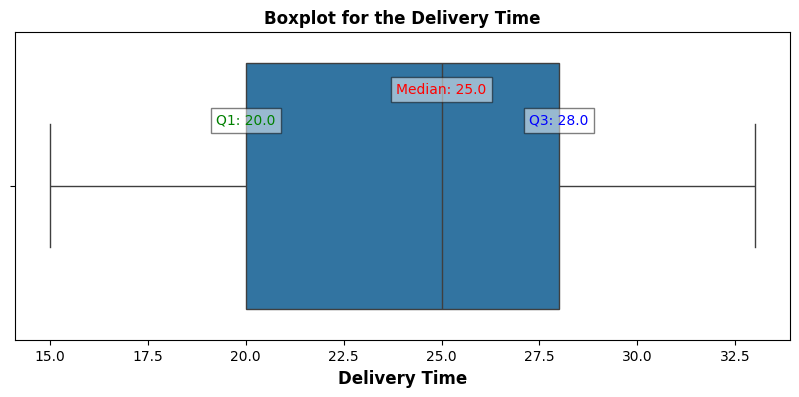

In [126]:
# Create boxplot for delivery times.
plt.figure(figsize=(10, 4))
box_plot = sns.boxplot(x=foodhub_df['delivery_time'])

# Calculate quartiles and median
Q1 = foodhub_df['delivery_time'].quantile(0.25)
Q3 = foodhub_df['delivery_time'].quantile(0.75)
median = foodhub_df['delivery_time'].median()

# Set the labels, title, position, fontsize and alignment for the output.
plt.text(x=median, y=-0.3, s=f'Median: {median}', color='red', ha='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(x=Q1, y=-0.2, s=f'Q1: {Q1}', color='green', ha='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(x=Q3, y=-0.2, s=f'Q3: {Q3}', color='blue', ha='center', bbox=dict(facecolor='white', alpha=0.5)) 
plt.xlabel('Delivery Time', fontsize=12, fontweight='bold')
plt.title('Boxplot for the Delivery Time', fontsize=12, fontweight='bold')

# Show the plot.
plt.show()

---
### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [20]:
# Create a new DataFrame, top_restaurants_df and retrieve the top 5 restaurants with the highest number of orders.
top_restaurants_df = foodhub_df['restaurant_name'].value_counts().reset_index()

# Print readable column names for the DataFrame foodhub_df.
top_restaurants_df.columns = ['Restaurant Name', 'Number of Orders']

# Print only the top 5 restaurants without the index column.
print(top_restaurants_df.head(5).to_string(index=False))

          Restaurant Name  Number of Orders
              Shake Shack               219
        The Meatball Shop               132
        Blue Ribbon Sushi               119
Blue Ribbon Fried Chicken                96
                     Parm                68


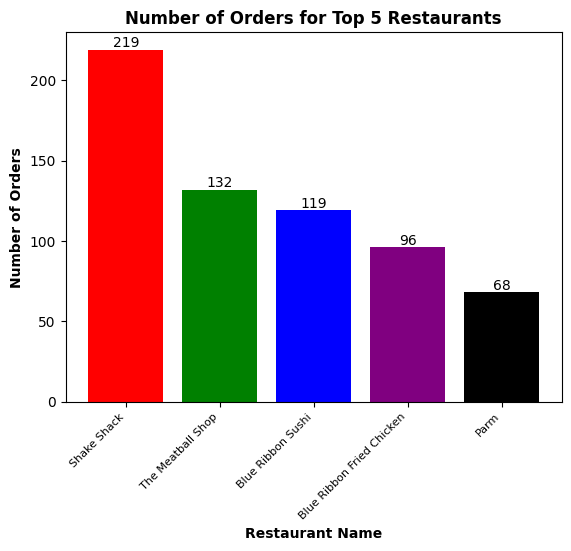

In [128]:
# To better visualize the number of orders for the top 5 restaurants, a bar chart was created.

# Create a list of colors to use for the bar chart restaurant names.
colors = ['red', 'green', 'blue', 'purple', 'black']

# Create bar chart of the top 5 restaurants with the highest number of orders.
restaurant_bars = plt.bar(top_restaurants_df['Restaurant Name'].head(5), top_restaurants_df['Number of Orders'].head(5),color=colors)

# Set the labels, title, position, fontsize and alignment for the bar chart output.
plt.xlabel('Restaurant Name', fontsize=10, fontweight='bold')
plt.ylabel('Number of Orders', fontsize=10, fontweight='bold')
plt.title('Number of Orders for Top 5 Restaurants', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=8, horizontalalignment='right')

# Add order numbers to the histogram bars for readability.
for restaurant_bar in restaurant_bars:
    yval = restaurant_bar.get_height()
    plt.text(restaurant_bar.get_x() + restaurant_bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

# Display the bar chart.
plt.show()

#### Observations:

The top 5 restaurants with the highest number of orders is shown in the chart below. 

Restaurant Name -- Number of Orders
1. Shake Shack -- 219
2. The Meatball Shop -- 132
3. Blue Ribbon Sushi -- 119
4. Blue Ribbon Fried Chicken -- 96
5. Parm -- 68

---
### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [22]:
# Get the most popular cuisine type and the number of orders.

# Filter the DataFrame to only include orders made on weekends.
weekend_orders_df = foodhub_df[foodhub_df['day_of_the_week'] == 'Weekend']

# Get the most popular cuisine type and the number of orders for weekends.
cuisine_counts = weekend_orders_df['cuisine_type'].value_counts()
most_popular_cuisine = cuisine_counts.idxmax()
number_of_orders = cuisine_counts.max()

# Print simple output of the most popular cuisine type and the number of orders for weekends.
print(f'The most popular cuisine type on weekends is {most_popular_cuisine} with {number_of_orders} orders.')

The most popular cuisine type on weekends is American with 415 orders.


#### Observations:
The most popular cuisine on the weekend, Saturday and Sunday, is American with 415 orders.

---
### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [129]:
# Query foodhub_df DataFrame for orders with a cost greater than $20.
expensive_orders = foodhub_df[foodhub_df['cost_of_the_order'] > 20]

# Calculate the % of expensive orders vs total orders.
percentage_expensive_orders = (len(expensive_orders)/len(foodhub_df)) * 100
print(f"The percentage of orders costing more than $20 is {percentage_expensive_orders:.0f}%.")

The percentage of orders costing more than $20 is 29%.


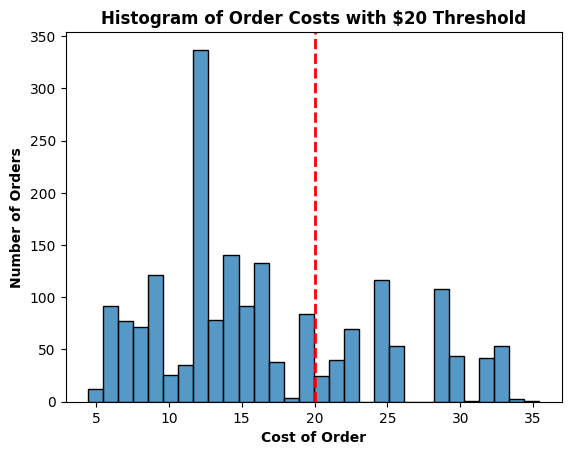

In [24]:
# Visualizing the expensive vs total orders a histogram provides an easier view to consume.
sns.histplot(foodhub_df['cost_of_the_order'], bins=30, edgecolor='black')

# Set the labels, title, position, fontsize and alignment for the bar chart output.
# Added vertical line at $20 for reference.
plt.axvline(20, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Cost of Order', fontsize=10, fontweight='bold')
plt.ylabel('Number of Orders', fontsize=10, fontweight='bold')
plt.title('Histogram of Order Costs with $20 Threshold', fontsize=12, fontweight='bold')

# Show histogram.
plt.show()

#### Observations:
Orders greater than 20 dollars is 29 percent across all restaurants. The histogram shows that the majority of orders in the 12 dollars to 17 dollars range. To potentially increase orders over 20 dollars incentives could be offered to existing customers with some sort of discount. New customers could have special offerings such as a free item or future order discounts to increase per order sales costs. 

---
### **Question 10**: What is the mean order delivery time? [1 mark]

The mean order delivery time is  24 minutes.


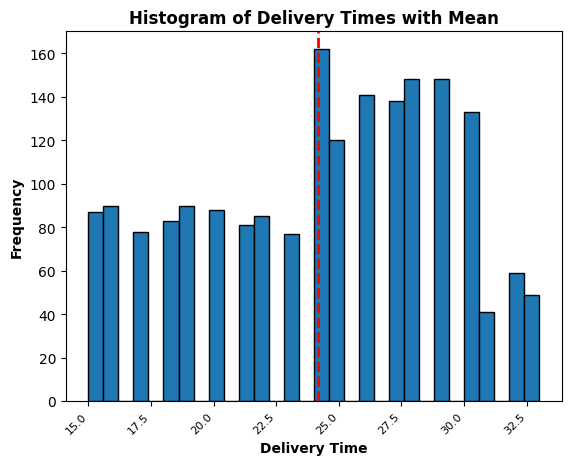

In [25]:
# Query the foodhub_df DataFrame for orders mean delivery time.
mean_delivery_time = foodhub_df['delivery_time'].mean()

# Print the mean order delivery time and round it to the nearest minute. 
print(f'The mean order delivery time is {mean_delivery_time: .0f} minutes.')

# Visualize the delivery times using a histogram to show the distribution of delivery times.
delivery_times = foodhub_df['delivery_time']

# Calculate the mean delivery time.
mean_delivery_time = delivery_times.mean()

# Create a histogram of the delivery times.
plt.hist(delivery_times, bins=30, edgecolor='black')

# Add a vertical line to indicate the mean delivery time.
plt.axvline(mean_delivery_time, color='red', linestyle='dashed', linewidth=2)

# Set the labels, title, position, fontsize and alignment for the bar chart output.
plt.xlabel('Delivery Time', fontsize=10, fontweight='bold')
plt.ylabel('Frequency', fontsize=10, fontweight='bold')
plt.title('Histogram of Delivery Times with Mean', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=8, horizontalalignment='right')

# Show the plot
plt.show()

#### Observations:
Query for the delivery time using the "delivery_time" column shows the average time is 24 minutes. To visualize all of the different delivery times a histogram provides a view of the dataset with 24 minutes marked with a dashed line.

---
### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [130]:
# Select the top 3 customers with the highest number of orders using the value_counts() method
# and the nlargest() method to retrieve the top 3 customers.
top_customers = foodhub_df['customer_id'].value_counts().nlargest(3)

# Convert the series to a DataFrame named top_customers_df and rename the columns for readability.
top_customers_df = top_customers.reset_index()
top_customers_df.columns = ['Customer ID', 'Number of Orders']

# Output the top_customers_df DataFrame as a table.
print('Top 3 customers:')
print(top_customers_df.to_string(index=False))

Top 3 customers:
 Customer ID  Number of Orders
       52832                13
       47440                10
       83287                 9


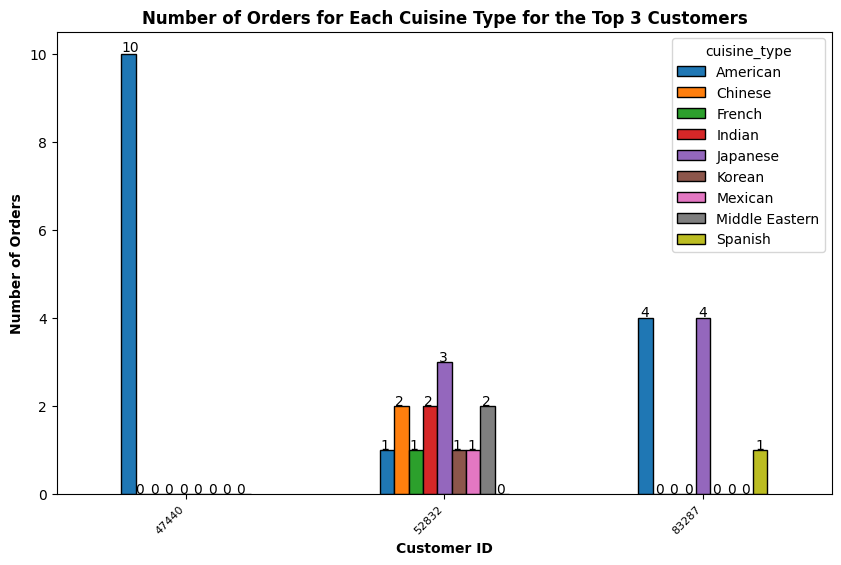

In [27]:
# To visualize the top 3 customers with more details on types of orders
# create  that contains only the orders from the top 3 customers
top_customers_orders = foodhub_df[foodhub_df['customer_id'].isin(top_customers.index)]

# Create a crosstab that counts the number of orders for each cuisine type for each customer.
cuisine_counts = pd.crosstab(top_customers_orders['customer_id'], top_customers_orders['cuisine_type'])

# Create a grouped bar chart of the top 3 customers and cuisine types.
cuisine_bar_counts = cuisine_counts.plot(kind='bar', stacked=False, figsize=(10, 6), edgecolor='black')

# Set the labels, title, position, fontsize and alignment for the bar chart output.
plt.xlabel('Customer ID', fontsize=10, fontweight='bold')
plt.ylabel('Number of Orders', fontsize=10, fontweight='bold')
plt.title('Number of Orders for Each Cuisine Type for the Top 3 Customers', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=8, horizontalalignment='right')

# Add values on top of each bar for readability.
# The 0s represent no orders for that cuisine type.
for cuisine_type in cuisine_bar_counts.patches:
    cuisine_bar_counts.annotate(str(cuisine_type.get_height()), (cuisine_type.get_x() * 1.005, cuisine_type.get_height() * 1.005))

# Show the plot.
plt.show()

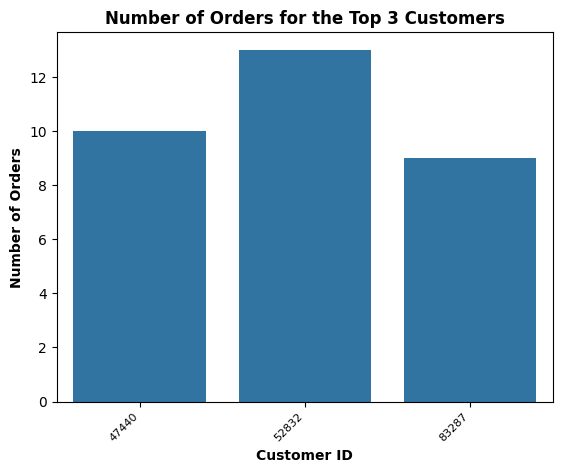

In [28]:
# Create a bar plot that counts the number of orders for each top customer.
sns.countplot(x='customer_id', data=top_customers_orders)

# Set the labels, title, position, fontsize and alignment for the bar chart output.
plt.xlabel('Customer ID', fontsize=10, fontweight='bold')
plt.ylabel('Number of Orders', fontsize=10, fontweight='bold')
plt.title('Number of Orders for the Top 3 Customers', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=8, horizontalalignment='right')

# Show the plot.
plt.show()

#### Observations:
The top customer, ID 52832, orders a variety of cuisine across restaurants. Customer, ID 832287, has a bit of variety but customer, ID 47449 only orders American. There are opportunities based on this information to potentially incentivize certains customers to try new cuisines with special offers, example customer 47440 could receive coupons to extend their cuisine experiences. Other customers that order more of a variety could still receive special offers but have them be focused on their most favorite and highest rated restaurant. 

---
## Multivariate Analysis

---
### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Cuisine vs Cost of the Order

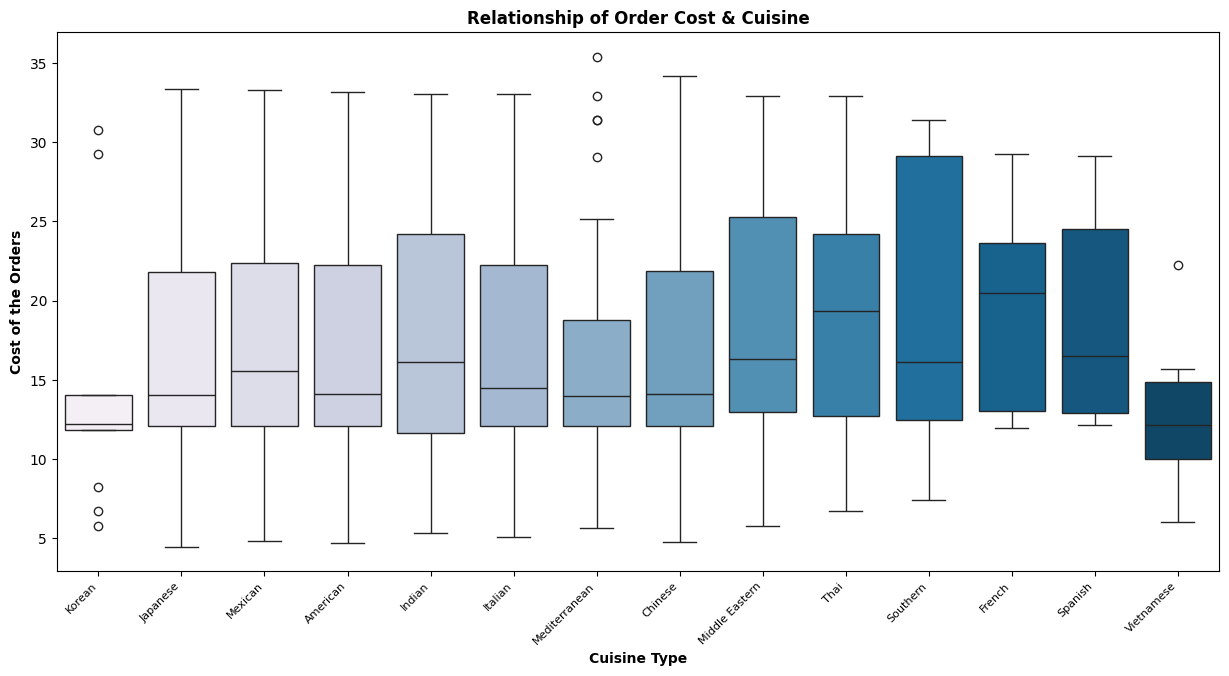

In [29]:
# Examine the relationship between cost of the order and cuisine type.
plt.figure(figsize=(15,7))

# Create a boxplot to show the relationship between cost of the order and cuisine type.
sns.boxplot(x = 'cuisine_type', y = 'cost_of_the_order', data = foodhub_df, palette = 'PuBu', hue = 'cuisine_type')

# Set the labels, title, position, fontsize and alignment for the bar chart output.
plt.xlabel('Cuisine Type', fontsize=10, fontweight='bold')
plt.ylabel('Cost of the Orders', fontsize=10, fontweight='bold')
plt.title('Relationship of Order Cost & Cuisine', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=8, horizontalalignment='right')
plt.xticks(rotation = 45)

# Show the plot.
plt.show()

#### Obversations:
The cuisine types Korean, Mediterranean and Vietnamese have outliers which could indicate out of the ordinary order costs because of large or small orders or potentially incorrectly entered data. There are also long whiskers for the more popular cuisines that represents a high variability in the data. 

The median for the majority of cuisine types is closer to the bottom (aka left) that represents a positively skewed (right skewed) distribution. This shows that much of the order costs are in the lower range, approximately 15 dollars to 17 dollars. 

#### Cuisine vs Food Preparation time

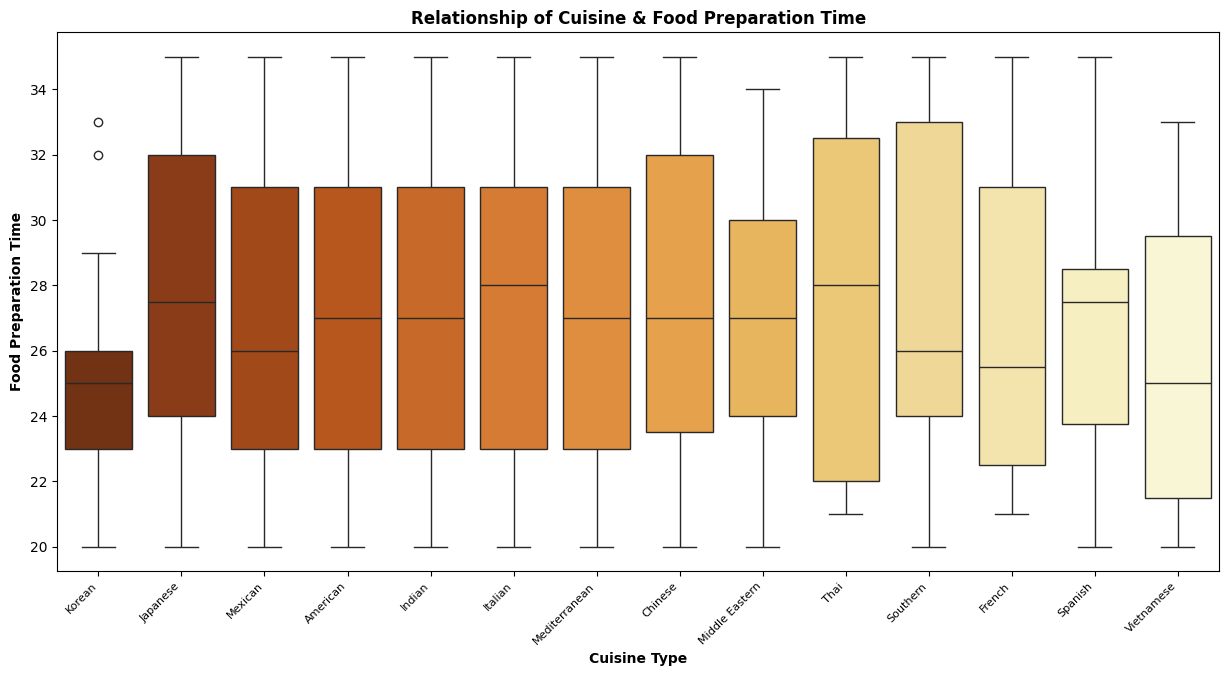

In [30]:
# Examine the relationship between cost of the order and cuisine type.
plt.figure(figsize=(15,7))

# Create a boxplot to show the relationship between cost of the order and cuisine type.
sns.boxplot(x = 'cuisine_type', y = 'food_preparation_time', data = foodhub_df, palette = 'YlOrBr_r')

# Set the labels, title, position, fontsize and alignment for the bar chart output.
plt.xlabel('Cuisine Type', fontsize=10, fontweight='bold')
plt.ylabel('Food Preparation Time', fontsize=10, fontweight='bold')
plt.title('Relationship of Cuisine & Food Preparation Time', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=8, horizontalalignment='right')
plt.xticks(rotation = 45)

# Show the plot.
plt.show()

#### Obversations:
Food preparation times tend to be high across the board with each restaurant. The company should investigate why food preparation time is because of large orders or lack of resources in the restaurants. There are cuisines that take less time to prepared but from analyzing other data relationship have lower net revenues. 

#### Day of the Week vs Delivery time

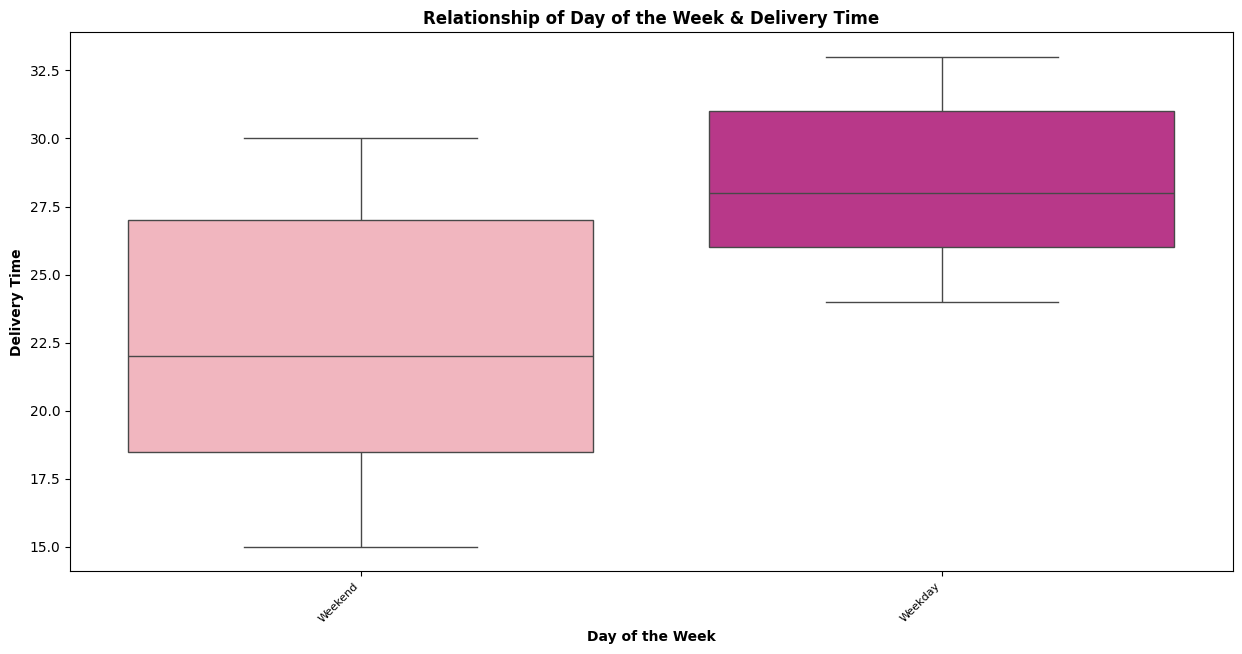

In [31]:
# Examine the relationship between day of the week and delivery time.
plt.figure(figsize=(15,7))

# Create a boxplot to show the relationship between day of the week and delivery time.
sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = foodhub_df, palette = 'RdPu')

# Set the labels, title, position, fontsize and alignment for the bar chart output.
plt.xlabel('Day of the Week', fontsize=10, fontweight='bold')
plt.ylabel('Delivery Time', fontsize=10, fontweight='bold')
plt.title('Relationship of Day of the Week & Delivery Time', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=8, horizontalalignment='right')
plt.xticks(rotation = 45)

# Show the plot.
plt.show()

#### Observations:
Delivery times have a large variability on the weekdays when it is most important to deliver to customers during a work week. Weekend delivery times are lower most likely because of the additional delivery resources that are used. 

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [32]:
# Sum the revenue generated by each restaurant and display the top 20 restaurants.

# Display all rows in the DataFrame.
pd.set_option('display.max_rows', None)
foodhub_df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False)

restaurant_name
Shake Shack                              3579.53
The Meatball Shop                        2145.21
Blue Ribbon Sushi                        1903.95
Blue Ribbon Fried Chicken                1662.29
Parm                                     1112.76
RedFarm Broadway                          965.13
RedFarm Hudson                            921.21
TAO                                       834.50
Han Dynasty                               755.29
Blue Ribbon Sushi Bar & Grill             666.62
Rubirosa                                  660.45
Sushi of Gari 46                          640.87
Nobu Next Door                            623.67
Five Guys Burgers and Fries               506.47
Momoya                                    492.13
Chipotle Mexican Grill $1.99 Delivery     491.69
Blue Ribbon Sushi Izakaya                 485.09
Tamarind TriBeCa                          426.71
Jack's Wife Freda                         416.75
Bareburger                                399.74
Sush

#### Obversations:
The company should consider reviewing the lower performing revenue restaurants as they could be costing more money for delivery times and the resources who deliver to customers. 

#### Rating vs Delivery time

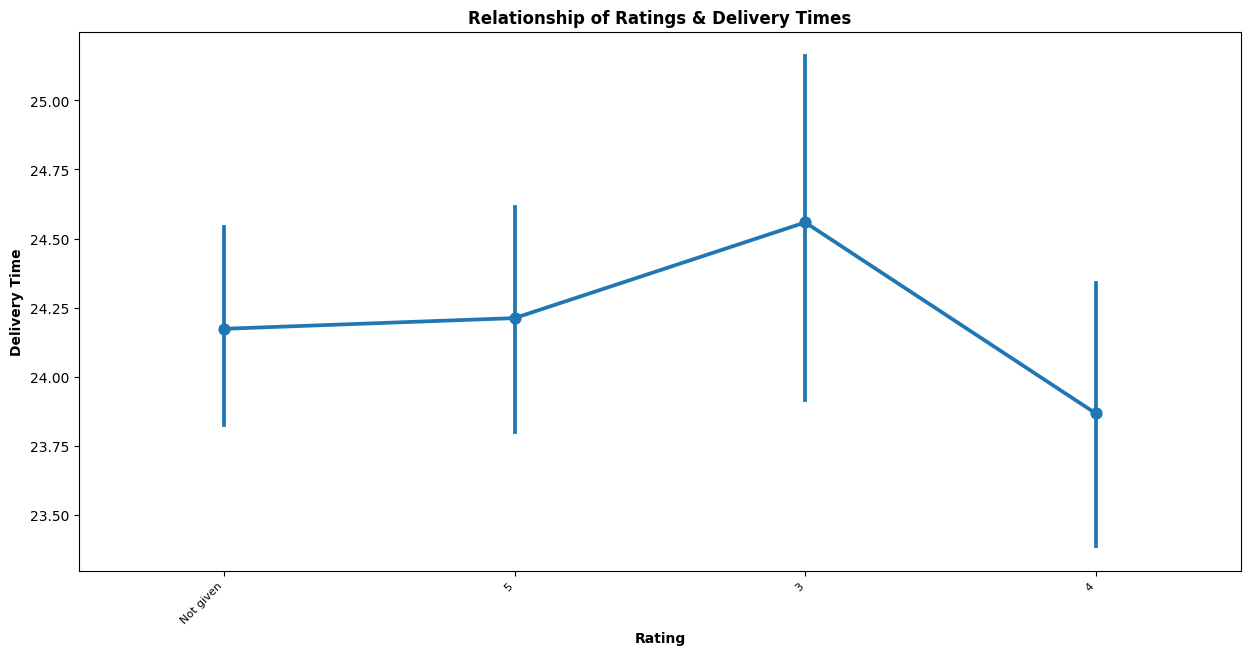

In [33]:
# Examine the relationship between day of the week and delivery time.
plt.figure(figsize=(15,7))

# Create a boxplot to show the relationship between day of the week and delivery time.
sns.pointplot(x = 'rating', y = 'delivery_time', data = foodhub_df)

# Set the labels, title, position, fontsize and alignment for the bar chart output.
plt.xlabel('Rating', fontsize=10, fontweight='bold')
plt.ylabel('Delivery Time', fontsize=10, fontweight='bold')
plt.title('Relationship of Ratings & Delivery Times', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=8, horizontalalignment='right')
plt.xticks(rotation = 45)

# Show the plot.
plt.show()

#### Obversations:
Delivery times between 'Not given' and a top rating of 5 do not vary much. The rating of 3 has the highest variability with delivery time which makes sense. The ratings of 4 have a lower delivery time which does not make sense and could have problems with the dataset. The rating of 'Not given' need to have some time of incentive to collect that information and see what it could be influencing. A recommendation to widen the spread of rating numbers is recommended to understand if there are possibly lower than 3 to help understand what restaurants need to make improvements. 

#### Rating vs Food preparation time

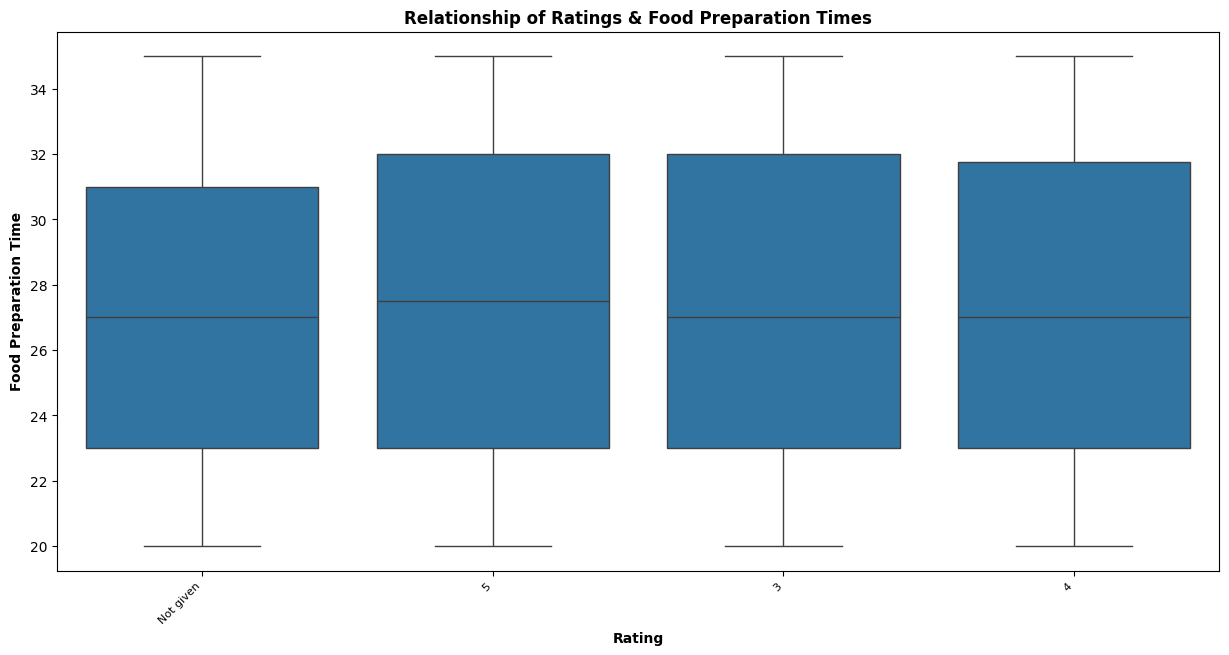

In [34]:
# Examine the relationship between day of the week and delivery time.
plt.figure(figsize=(15,7))

# Create a boxplot to show the relationship between rating and preparation time.
sns.boxplot(x='rating', y='food_preparation_time', data=foodhub_df)

# Set the labels, title, position, fontsize and alignment for the bar chart output.
plt.xlabel('Rating', fontsize=10, fontweight='bold')
plt.ylabel('Food Preparation Time', fontsize=10, fontweight='bold')
plt.title('Relationship of Ratings & Food Preparation Times', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=8, horizontalalignment='right')
plt.xticks(rotation = 45)

# Show the plot.
plt.show()

#### Obversations:
The relationship of food preparation time and rating has very small variablility shown by the whiskers. The whiskers are short and suggests that the data values are relatively concentrated and have low variability. Delivery time is the most important indicator to the customer to get their order. A rating by a customer is based on food preparation time plus (+) delivery time. This plot shows that food preparation is good but delivery times are making an impact. 

#### Rating vs Cost of the order

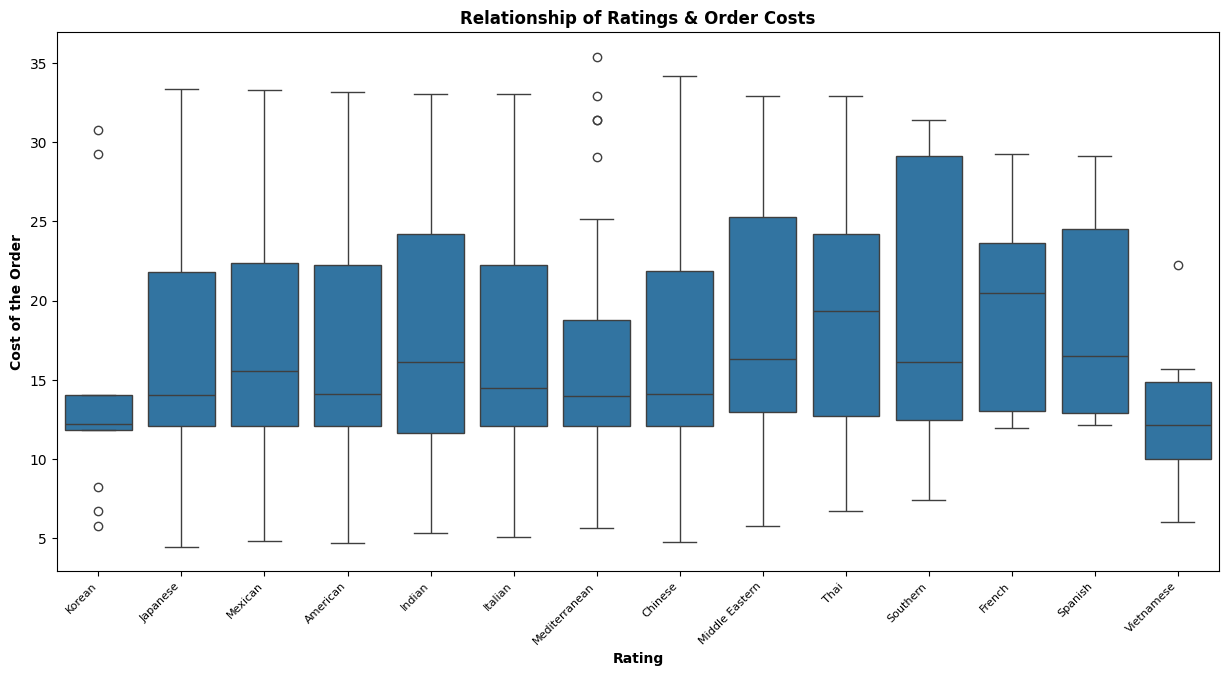

In [35]:
# Examine the relationship between rating and cost of the order.
plt.figure(figsize=(15,7))

# Create a boxplot to show the relationship between rating and preparation time.
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=foodhub_df)

# Set the labels, title, position, fontsize and alignment for the bar chart output.
plt.xlabel('Rating', fontsize=10, fontweight='bold')
plt.ylabel('Cost of the Order', fontsize=10, fontweight='bold')
plt.title('Relationship of Ratings & Order Costs', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=8, horizontalalignment='right')
plt.xticks(rotation = 45)

# Show the plot.
plt.show()

#### Obversations:
There is a high variability with the order cost and rating. The bigger question to ask is rating affected by the cost of the order or the delivery time. Customers could be rating lower or not rating because of a high food cost and not getting the order on time or quickly. Without more details regarding ratings such as a comment that are easily selectable to collect. 

#### Correlation among variables

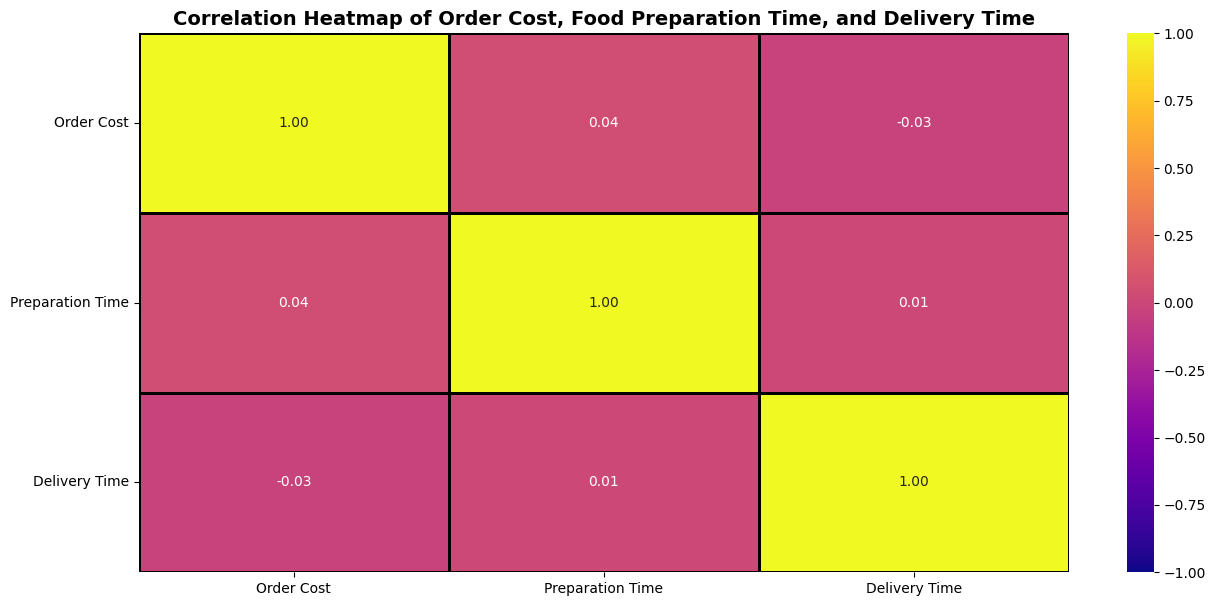

In [48]:
# Create a list of columns to include in the correlation matrix.
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

# Create a new DataFrame with the correlation matrix
corr_df = foodhub_df[col_list].corr()

# Rename the columns
corr_df.columns = ['Order Cost', 'Preparation Time', 'Delivery Time']
corr_df.index = ['Order Cost', 'Preparation Time', 'Delivery Time']

plt.figure(figsize=(15, 7))

# Add a title to the heatmap
plt.title('Correlation Heatmap of Order Cost, Food Preparation Time, and Delivery Time', fontsize=14, fontweight='bold')

# Create a heatmap with a custom color map and add annotations to the heatmap.
sns.heatmap(corr_df, annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='plasma', linewidths=1, linecolor='black')

# Rotate the y-axis labels (otherwise they can be hard to read)
plt.yticks(rotation=0)

# Show the plot.
plt.show()

#### Obversations:
As observed previously the cost of the order, preparation time (food preparation) and delivery times are all strongly correlated. Overall the preparation time and delivery time are having the largest affect on ratings by customers. These are the most important business processes that need to be investigated in the business. 

---
### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [49]:
# Find the restaurants that are not rated (Note given) and create a new DataFrame, restaurants_not_rated_df.
restaurants_not_rated_df = foodhub_df[foodhub_df['rating'] != 'Not given'].copy()

# The rating columns is an object type and should be converted to a type int.
restaurants_not_rated_df['rating'] = restaurants_not_rated_df['rating'].astype('int')

# Create a new DataFrame, ratings_count_df, that groups the restaurants by name and calculates the count and mean of ratings.
ratings_count_df = restaurants_not_rated_df.groupby(['restaurant_name'])['rating'].agg(['count', 'mean']).reset_index()

# Filter the restaurants with a rating count of more than 50 and a mean rating greater than 4.
restaurants_promo_df = ratings_count_df[(ratings_count_df['count'] > 50) & (ratings_count_df['mean'] > 4)]

# Output the restaurants sorted by the mean rating of 4 in descending order.
restaurants_promo_df.head()

,restaurant_name,count,mean
16,Blue Ribbon Fried Chicken,64,4.328125
17,Blue Ribbon Sushi,73,4.219178
117,Shake Shack,133,4.278195
132,The Meatball Shop,84,4.511905


#### Observations:
There are 4 restaurants that qualify for a promotional offering. Looking back at Question 5 there are 736 restaurants that have a rating of 'Not given'. As part of the recommendations offering an incentive to customers to provide a rating could influence a greater number of restaurants that could be eligible for the promotions offering. Having more restaurants in the promotional offering will drive more net revenue. 

---
### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [50]:
# Count the number of orders greater than $20.
num_orders_over_20 = foodhub_df[foodhub_df['cost_of_the_order'] > 20]['cost_of_the_order'].count()

# Calculate the total revenue of orders greater than $20
total_revenue_over_20 = foodhub_df[foodhub_df['cost_of_the_order'] > 20]['cost_of_the_order'].sum()

# Print the order count and calculate the net revenue using total count and the 25% surcharge.
print(f'The number of orders costing more than $20 is {num_orders_over_20} which generates a net revenue of ${total_revenue_over_20:,.2f}.')

# Count the number of orders greater than $5 and less than $20.
num_orders_between_5_and_20 = foodhub_df[(foodhub_df['cost_of_the_order'] >= 5) & (foodhub_df['cost_of_the_order'] < 20)]['cost_of_the_order'].count()

# Calculate the total revenue of orders greater than $5 and less than $20.
total_revenue_between_5_and_20 = foodhub_df[(foodhub_df['cost_of_the_order'] >= 5) & (foodhub_df['cost_of_the_order'] < 20)]['cost_of_the_order'].sum()

# Print the order count and calculate the net revenue using total count and the 15% surcharge.
print(f'The number of orders costing less than $5 is {num_orders_between_5_and_20} which generates a net revenue of ${total_revenue_between_5_and_20:,.2f}.')

# Calculate the total revenue using the number of orders over $20 and $5.
print(f'Total revenue is ${total_revenue_over_20 * .25 + total_revenue_between_5_and_20 * .15:,.2f}.')

The number of orders costing more than $20 is 555 which generates a net revenue of $14,754.91.
The number of orders costing less than $5 is 1334 which generates a net revenue of $16,517.17.
Total revenue is $6,166.30.


In [51]:
# Example of revenue difference if reversed as mentioned in the observation.
# Calculate the total revenue using the number of orders over $20 and $5.
print(f'Total revenue is ${total_revenue_over_20 * .15 + total_revenue_between_5_and_20 * .25:,.2f}.')

Total revenue is $6,342.53.


#### Observations:
The numner of orders costing more than more than 20 dollars is 555 which generates a net revenue of 14,754.91 dollars.
The number of orders costing less than 5 dollars is 1,334 which generates a net revenue of 16,517.17 dollars.
Total revenue is 6,166.30 dollars.

A recommendation to make is to reverse the surcharges. Lesser cost orders should be surcharged larger amounts to offset the costs. Example: a 5 dollars order costs just as much to delivery and prepare as a 20 dollar order. If reversed an additional 176.23 dollars would be netted. 

---
### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [52]:
# Calculate the number of orders that take more than 60 minutes to get 
# delivered (food preparation time + delivery time).
orders_over_60_min = foodhub_df[foodhub_df['delivery_time'] + foodhub_df['food_preparation_time']> 60].shape[0]

# Include orders that take exactly 60 minutes to get delivered (food preparation time + delivery time).
orders_60_min_and_over = foodhub_df[foodhub_df['delivery_time'] + foodhub_df['food_preparation_time'] >= 60].shape[0]

# Calculate the total number of orders in the dataset.
total_orders = foodhub_df.shape[0]

# Calculate the percentage of orders that take more than 60 minutes to get delivered.
percentage_over_60_min = (orders_over_60_min / total_orders) * 100
percentange_60_min_and_over = (orders_60_min_and_over / total_orders) * 100

# Print output.
print(f'The total number of orders that take over 60 minutes to delivery is {orders_over_60_min} and accounts for {percentage_over_60_min: .2f}% of the total orders.')
print(f'If we include orders that take exactly 60 minutes to get delivered, the total number of orders is {orders_60_min_and_over} and accounts for {percentange_60_min_and_over: .2f}% of the total orders.')


The total number of orders that take over 60 minutes to delivery is 200 and accounts for  10.54% of the total orders.
If we include orders that take exactly 60 minutes to get delivered, the total number of orders is 245 and accounts for  12.91% of the total orders.


#### Observations:
The total number of orders that takes over 60 minutes to delivery is 200 and accounts for  10.54% of the total orders. If we include orders that take exactly 60 minutes to get delivered, the total number of orders is 245 and accounts for  12.91% of the total orders.

Understanding these data points can help drive delivery guarantees for customers. This information could also influence any incentives for customers if they exceed the 60 minute guarantee. The guarantee could be set to a guaranteed lower time limit. Setting to a lower time limit may attract more customers that need food faster. Those incentives could include coupons, order cost reductions (% off).

The dataset can be re-analyzed on a recurring basis to potentially indicate deficiencies within a restaurant's processes that need to be addressed.   

---
### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [53]:
# The dataset only uses the 'day_of_the_week' set to a weekday or weekend.
# For better tracking of actual days of the week a function was created to categorize the days of the week.
# Recommendation:
#       The data should be cleaned-up to represent actual days of the week for better analysis.
#       This should be done to understand impact of delivery times on actual days of the week.
#       Example: Orders could be "pre-ordered" on a Monday but set to deliver on a Wednesday. 

mean_delivery_time_weekday = foodhub_df[foodhub_df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
print(f'Mean delivery time on weekdays is {mean_delivery_time_weekday: .2f}%')
mean_delivery_time_weekend = foodhub_df[foodhub_df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print(f'Mean delivery time on weekends is {mean_delivery_time_weekend: .2f}%')

# Calculate the difference
difference = mean_delivery_time_weekday - mean_delivery_time_weekend

print(f'The difference between delivery time on weekdays vs weekends is {difference: .2f}%')

Mean delivery time on weekdays is  28.34%
Mean delivery time on weekends is  22.47%
The difference between delivery time on weekdays vs weekends is  5.87%


#### Observations:
The average delivery time on the weekends is less than weekdays by 6%. This could indicate that there are differences in staffing of the restaurants to prepare food quicker and/or there are more delivery drivers available. Deliveries overall are important but during the weekdays delivery times should be quicker to those that are working at businesses. The differences between delivery times should be investigated further looking at staffing and delivery support.

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions & Recommendations:

Overall the dataset provides a good level of detail to perform analysis and determine where there are potential issues. The primary elements to further analyze in the business are related to food preparation time, delivery time and ratings. Food preparation and delivery time should always be considered in combination. If food preparation is fast but delivery slow that affects ratings. Ratings details are lacking to help make more informed decisions on what to change in the company or the participating restaurants. Those details should be expanded on with additional data collection points like comments and simple to select reasons for satisfaction or not. 

Individual participating restaurants should also be evaluated on their membership based on the number and cost of orders. There are restaurants with lower orders that could be causing the company to lose net revenue. 

Recommendations:
*  Offer incentives to ensure ratings are collected. Additionally collect remarks with ratings as a better indicator of issues.
*  Offer promotions to drive new customer growth
*  Collect additional specific data for days of the week and weekends.
*  Highlight low performing restaurants to encourage growth across all participating restaurants.
*  Investigate inefficiences in food preparation time.
*  Investigate delivery time issues.
*  Consider changing surcharges for lesser cost orders.
*  Offer walk-in pickups to remove the cost of delivery services.
*  Offer pre-ordering to target days and potentially increase delivery services to meet demand.

---